***
# Car sales analysis
***

1. **Évolution des ventes (scatter plot)**
    - Totales
    - VÉ vs VCI <br> <br>
2. **Analyse des caractéristiques des acheteurs de VÉ pour les années train (2017-2018)**
    - Variables quantitatives (masse, age)
    - Variables qualitative (région, ville)
***

In [1]:
# Create folders and getting path
import os
cwd = os.getcwd()

# Loop to create folders
folder_names = ['Dataframe', 'Output', 'Data']

folders = {}
for folder_name in folder_names:
    folders[folder_name] = os.path.join(cwd, folder_name)

    if not os.path.exists(os.path.join(cwd, folder_name)):
        os.makedirs(os.path.join(cwd, folder_name))
        print(f'Le dossier « {folder_name} » a été créé')

    else:
        print(f'Le dossier « {folder_name} » est existant')


# Création des variables de path

# Déterminer si os est win ou linux pour définir les path
if os.name == 'nt':
    slash = '\\'
elif os.name == 'posix':
    slash = '/'

path_prog =     cwd + slash
path_data =     folders['Data'] + slash
path_df =       folders['Dataframe'] + slash
path_output =   folders['Output'] + slash

# Mettre \\ pour éviter les erreurs
path_dict = [path_prog, path_data, path_df, path_output]
for path in path_dict:
    path = path.replace('\\','\\\\')


# Détermination de l'année
print()
print(path_prog)
print(path_data)
print(path_df)
print(path_output)

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant

c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Data\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Output\


In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
df_unique = pd.read_hdf(path_df + 'df_unique.h5')
df_unique.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5,30549.0,9.65
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6,40840.0,5.55


In [17]:
# Missing values
df_unique.isna().sum()

AN                         0
NOSEQ_VEH                  0
CLAS                       0
TYP_VEH_CATEG_USA          0
MARQ_VEH                   0
MODEL_VEH                  0
ANNEE_MOD                  0
MASSE_NETTE               51
NB_CYL                 70472
CYL_VEH                78366
NB_ESIEU_MAX         2242375
COUL_ORIG              42630
TYP_CARBU                  0
TYP_DOSS_PERS              0
PHYS_SEX              492920
PHYS_AGE              492920
REG_ADM                22168
MRC                    22168
CG_FIXE                22168
link_model_an         289509
year                  289509
model                 289509
brand                 289509
prix_min              289519
prix_max              309633
cons_min              368916
cons_max              368916
prix_mean             309633
cons_mean             368916
dtype: int64

In [19]:
# Describe numeric data
pd.options.display.float_format = '{:.2f}'.format
df_unique.describe()

,AN,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,PHYS_AGE,CG_FIXE,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean
count,2242375.00,2242375.00,2242324.00,2171903.00,2164009.00,0.00,1749455.00,2220207.00,1952856.00,1932742.00,1873459.00,1873459.00,1932742.00,1873459.00
mean,2018.89,2019.04,1689.80,4.74,2586.95,NaN,49.26,56546.28,29173.08,45034.80,7.35,16.83,37044.46,12.09
std,1.42,1.46,386.02,1.31,1148.90,NaN,15.77,22055.93,14720.06,21608.99,1.61,22.25,17510.30,11.42
min,2017.00,2017.00,500.00,3.00,640.00,NaN,15.00,1023.00,9988.00,17188.00,1.90,2.60,13588.00,2.25
25%,2018.00,2018.00,1390.00,4.00,1984.00,NaN,37.00,41060.00,20198.00,32695.00,6.20,9.40,27650.00,7.90
50%,2019.00,2019.00,1610.00,4.00,2001.00,NaN,49.00,65005.00,26700.00,41090.00,7.10,10.70,33449.00,8.80
75%,2020.00,2020.00,1921.00,6.00,3001.00,NaN,61.00,67050.00,32998.00,50298.00,8.30,12.60,40149.00,10.55
max,2021.00,2022.00,3965.00,9.00,8396.00,NaN,100.00,99902.00,562790.00,850000.00,16.20,100.00,650000.00,58.10


**Note** : 
1. There seems to be some outliers in prices and consumptions

In [23]:
# Describe categorical data 
categorical_col = ['AN','CLAS','TYP_VEH_CATEG_USA','COUL_ORIG','TYP_CARBU','TYP_DOSS_PERS','PHYS_SEX','REG_ADM','MRC']
df_unique[categorical_col]

,AN,CLAS,TYP_VEH_CATEG_USA,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,REG_ADM,MRC
0,2017,PAU,AU,ROU,E,P,F,Centre-du-Québec (17),Drummond (49 )
1,2017,PAU,AU,NOI,W,P,M,Saguenay–Lac-Saint-Jean (02),Saguenay (941)
2,2017,PAU,AU,GRI,E,P,F,Laurentides (15),Les Laurentides (78 )
3,2017,PAU,AU,ROU,E,P,M,Lanaudière (14),Les Moulins (64 )
4,2017,PAU,AU,BLA,E,P,M,Mauricie (04),Maskinongé (51 )
...,...,...,...,...,...,...,...,...,...
421282,2021,PAU,AU,NOI,L,P,F,Saguenay–Lac-Saint-Jean (02),Lac-Saint-Jean-Est (93 )
421283,2021,PAU,AU,GRI,E,P,F,Laurentides (15),Argenteuil (76 )
421284,2021,PAU,AU,NOI,E,P,F,Chaudière-Appalaches (12),Les Etchemins (28 )
421285,2021,CAU,AU,BLE,L,M,NaN,Laval (13),Laval (65 )


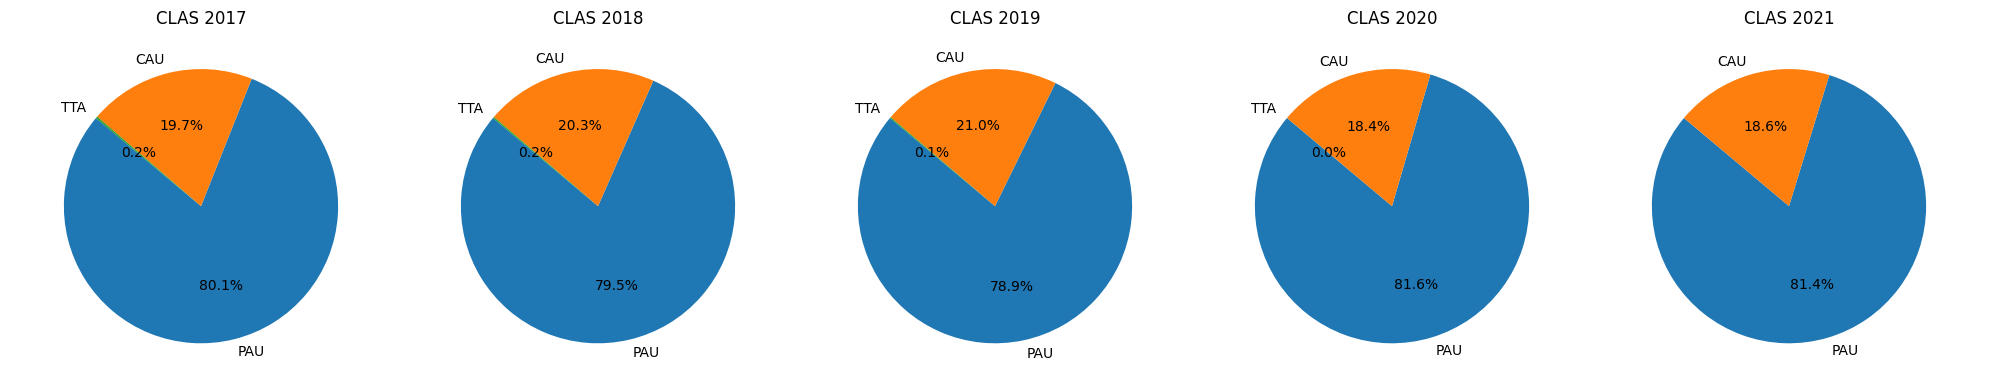

In [66]:
import matplotlib.pyplot as plt

# Create a single figure with subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns for each year

# Iterate through years from 2017 to 2021
for i, year in enumerate(range(2017, 2022)):
    # Filter data for the current year
    data_year = df_unique[df_unique['AN'] == year]

    # Create a pie chart for the current year on the corresponding subplot
    clas_counts = data_year['CLAS'].value_counts()
    
    axes[i].pie(clas_counts, labels=clas_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'CLAS {year}')
    axes[i].axis('equal')  # Ensure an equal aspect ratio for the pie chart

# Display the subplots
plt.tight_layout()  # Adjust subplot spacing
plt.show()


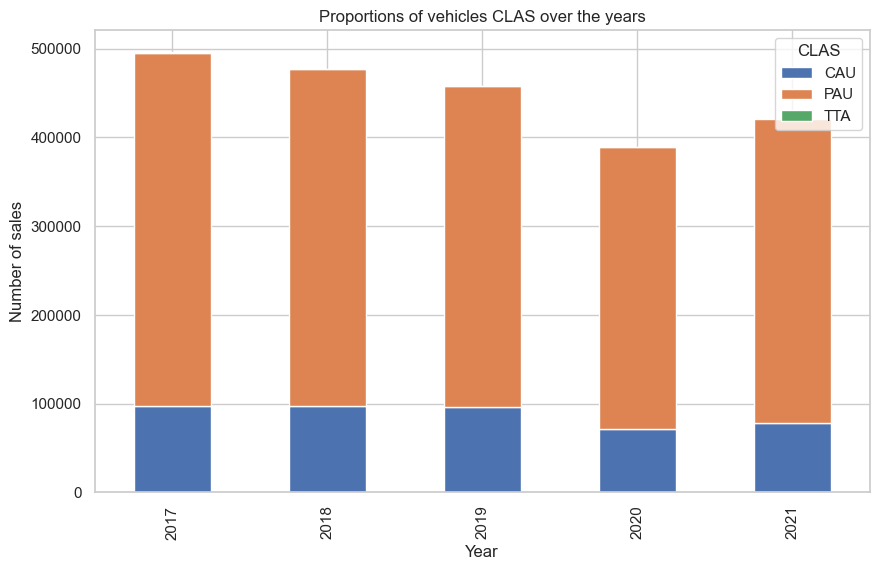

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter and group the data by year and class
grouped = df_unique.groupby(['AN', 'CLAS']).size().unstack(fill_value=0)

# Create the grouped bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Year')
ax.set_ylabel('Number of sales')
ax.set_title('Proportions of vehicles CLAS over the years')
ax.legend(title='CLAS')
plt.show()

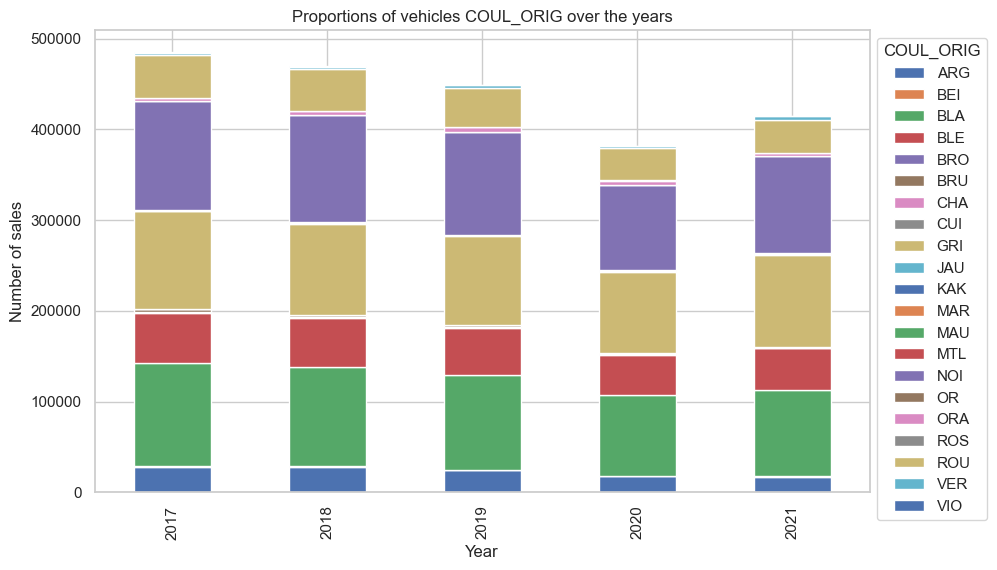

In [84]:
# Filter and group the data by year and class
grouped = df_unique.groupby(['AN', 'COUL_ORIG']).size().unstack(fill_value=0)

# Create the grouped bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Year')
ax.set_ylabel('Number of sales')
ax.set_title('Proportions of vehicles COUL_ORIG over the years')
ax.legend(title='COUL_ORIG', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_3296\2838177730.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_colors = grouped.apply(lambda row: row.nlargest(5).append(pd.Series(row.nlargest(5).sum(), index=['OTHERS'])), axis=1)
C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_3296\2838177730.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_colors = grouped.apply(lambda row: row.nlargest(5).append(pd.Series(row.nlargest(5).sum(), index=['OTHERS'])), axis=1)
C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_3296\2838177730.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_colors = grouped.apply(lambda row: row.nlargest(5).append(pd.Series(row.nlargest(5).sum(), index=['OTHERS'])), axis=1)
C:\U

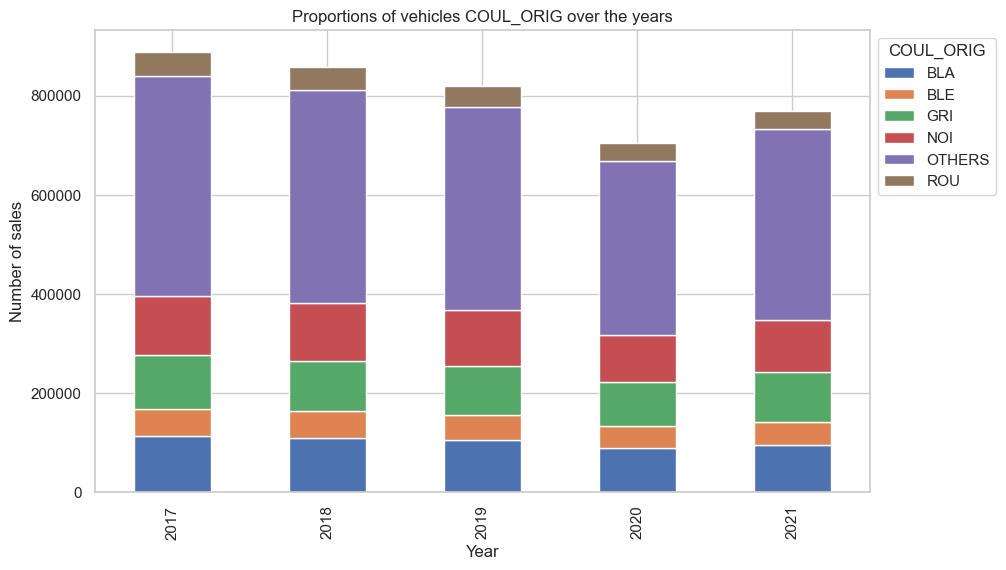

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter and group the data by year and class
grouped = df_unique.groupby(['AN', 'COUL_ORIG']).size().unstack(fill_value=0)

# Get the top 5 colors with the most observations
top_colors = grouped.apply(lambda row: row.nlargest(5).append(pd.Series(row.nlargest(5).sum(), index=['OTHERS'])), axis=1)

# Create the grouped bar chart
ax = top_colors.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of sales')
ax.set_title('Proportions of vehicles COUL_ORIG over the years')
ax.legend(title='COUL_ORIG', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [101]:
top_colors = grouped.apply(lambda row: row.nlargest(5).append(pd.Series(row.nlargest(5).sum(), index=['OTHERS'])), axis=1)
top_colors

C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_3296\1086408543.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_colors = grouped.apply(lambda row: row.nlargest(5).append(pd.Series(row.nlargest(5).sum(), index=['OTHERS'])), axis=1)
C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_3296\1086408543.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_colors = grouped.apply(lambda row: row.nlargest(5).append(pd.Series(row.nlargest(5).sum(), index=['OTHERS'])), axis=1)
C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_3296\1086408543.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_colors = grouped.apply(lambda row: row.nlargest(5).append(pd.Series(row.nlargest(5).sum(), index=['OTHERS'])), axis=1)
C:\U

,BLA,BLE,GRI,NOI,OTHERS,ROU
AN,,,,,,
2017,113841,54993,107905,119991,443862,47132
2018,109871,53827,100196,118462,428931,46575
2019,104581,51499,97886,113304,410197,42927
2020,89293,43693,89367,94355,352057,35349
2021,94888,46087,101104,106216,384978,36683


In [197]:
# create the top values df
test = grouped.copy()

mean_row = test.mean().to_frame().T
mean_row.index = ['Mean']

test = pd.concat([test, mean_row])

test = test.sort_values(by='Mean', axis=1, ascending=False).drop('Mean')
test


COUL_ORIG,NOI,BLA,GRI,BLE,ROU,ARG,ORA,VER,BRU,BRO,JAU,VIO,BEI,KAK,OR,CHA,MAU,MAR,MTL,ROS,CUI
2017,119991.00,113841.00,107905.00,54993.00,47132.00,28309.00,3240.00,1910.00,2662.00,1144.00,485.00,834.00,749.00,345.00,321.00,199.00,288.00,139.00,74.00,157.00,135.00
2018,118462.00,109871.00,100196.00,53827.00,46575.00,28089.00,4114.00,1957.00,2459.00,816.00,414.00,667.00,469.00,360.00,256.00,210.00,136.00,198.00,149.00,96.00,101.00
2019,113304.00,104581.00,97886.00,51499.00,42927.00,24276.00,5511.00,2723.00,2377.00,936.00,662.00,693.00,466.00,359.00,171.00,210.00,119.00,221.00,105.00,110.00,94.00
2020,94355.00,89293.00,89367.00,43693.00,35349.00,17832.00,4493.00,2902.00,1093.00,686.00,1132.00,99.00,348.00,432.00,162.00,168.00,56.00,114.00,185.00,82.00,68.00
2021,106216.00,94888.00,101104.00,46087.00,36683.00,17227.00,3228.00,3967.00,946.00,690.00,1398.00,84.00,248.00,711.00,152.00,156.00,152.00,66.00,159.00,66.00,103.00


In [212]:
test2 = test.copy()

test2['OTHER'] = test2.iloc[:,5:].sum(axis=1)
test2 = test2.iloc[:, np.r_[:5, -1:0]]
test2

COUL_ORIG,NOI,BLA,GRI,BLE,ROU,OTHER
2017,119991.00,113841.00,107905.00,54993.00,47132.00,40991.00
2018,118462.00,109871.00,100196.00,53827.00,46575.00,40491.00
2019,113304.00,104581.00,97886.00,51499.00,42927.00,39033.00
2020,94355.00,89293.00,89367.00,43693.00,35349.00,29852.00
2021,106216.00,94888.00,101104.00,46087.00,36683.00,29353.00


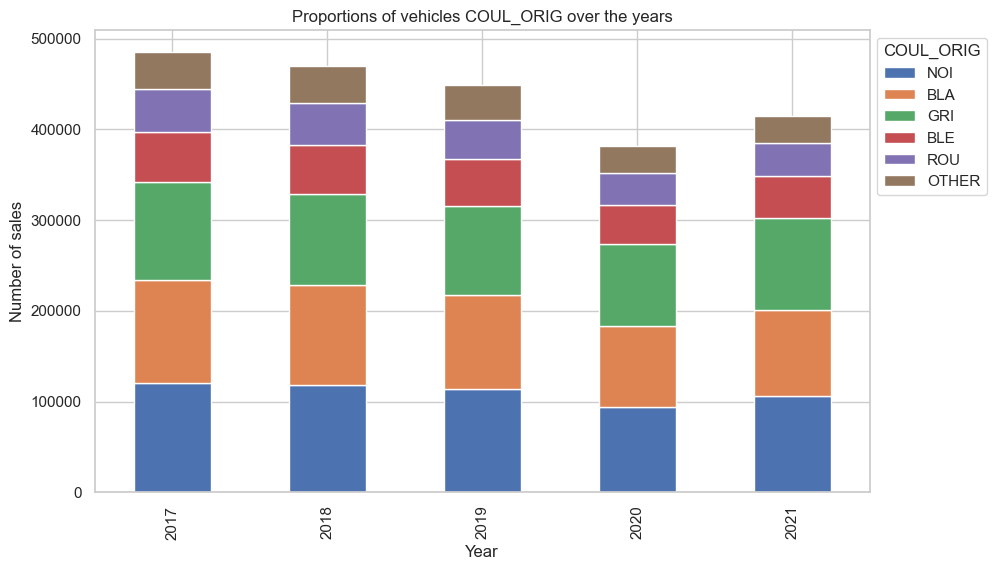

In [213]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter and group the data by year and class
# grouped = df_unique.groupby(['AN', 'COUL_ORIG']).size().unstack(fill_value=0)

# Get the top 5 colors with the most observations
# top_colors = grouped.apply(lambda row: row.nlargest(5).append(pd.Series(row.nlargest(5).sum(), index=['OTHERS'])), axis=1)

# Create the grouped bar chart
ax = test2.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of sales')
ax.set_title('Proportions of vehicles COUL_ORIG over the years')
ax.legend(title='COUL_ORIG', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
# Nombre de vente par type de carburant

# Nombre de vente par région

# prix moy

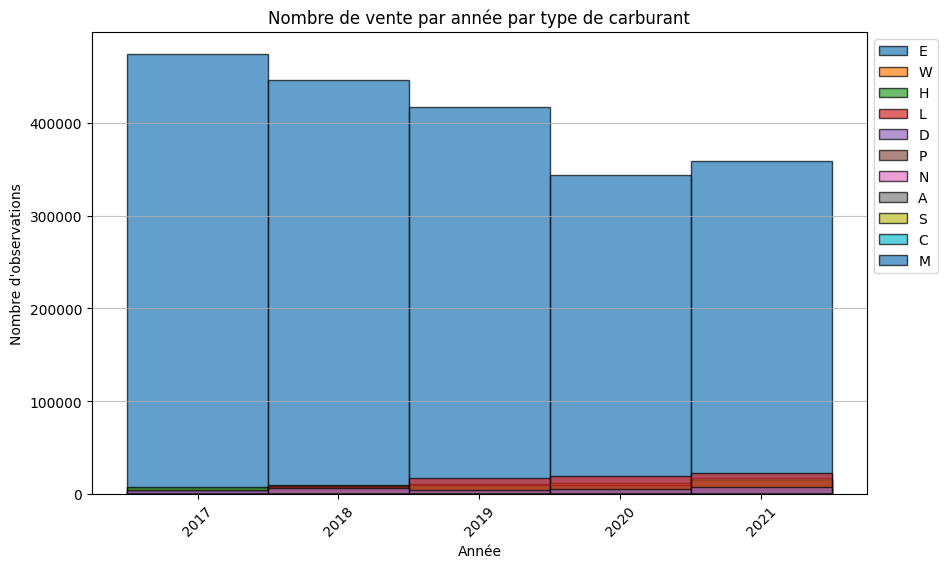

In [5]:
import matplotlib.pyplot as plt

# Calculate the range for the x-axis
min_year = min(df_unique['AN'])
max_year = max(df_unique['AN'])

# Calculate the number of bins based on the range
nb_bins = max_year - min_year + 1

plt.figure(figsize=(10, 6))

# Create a list of unique values in the 'TYPE_CARBU' column
carbu_types = df_unique['TYP_CARBU'].unique()

# Iterate through carbu types and stack the bars
for carbu_type in carbu_types:
    data_subset = df_unique[df_unique['TYP_CARBU'] == carbu_type]
    
    # Reduce the width of the bars by setting the width parameter
    plt.hist(data_subset['AN'], bins=nb_bins, edgecolor='k', align='mid', range=(min_year - 0.5, max_year + 0.5), label=carbu_type, alpha=0.7, width=1)

plt.title('Nombre de vente par année par type de carburant')
plt.xlabel('Année')
plt.ylabel('Nombre d\'observations')
plt.xticks(range(min_year, max_year + 1), rotation=45)  # Set x-axis ticks for full years

# Move the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()



<u>**Type de carburant**</u> <br>
A = Autre <br>
C = Hydrogène <br>
D = Diésel <br>
E = Essence <br>
H = Hybride <br>
L = Électricité <br>
M = Méthanol <br>
N = Gaz naturel <br>
P = Propane <br>
S = Non-propulsé <br>
T = Éthanol <br>
W = Hybride branchable <br>
blanc = Non précisé <br>

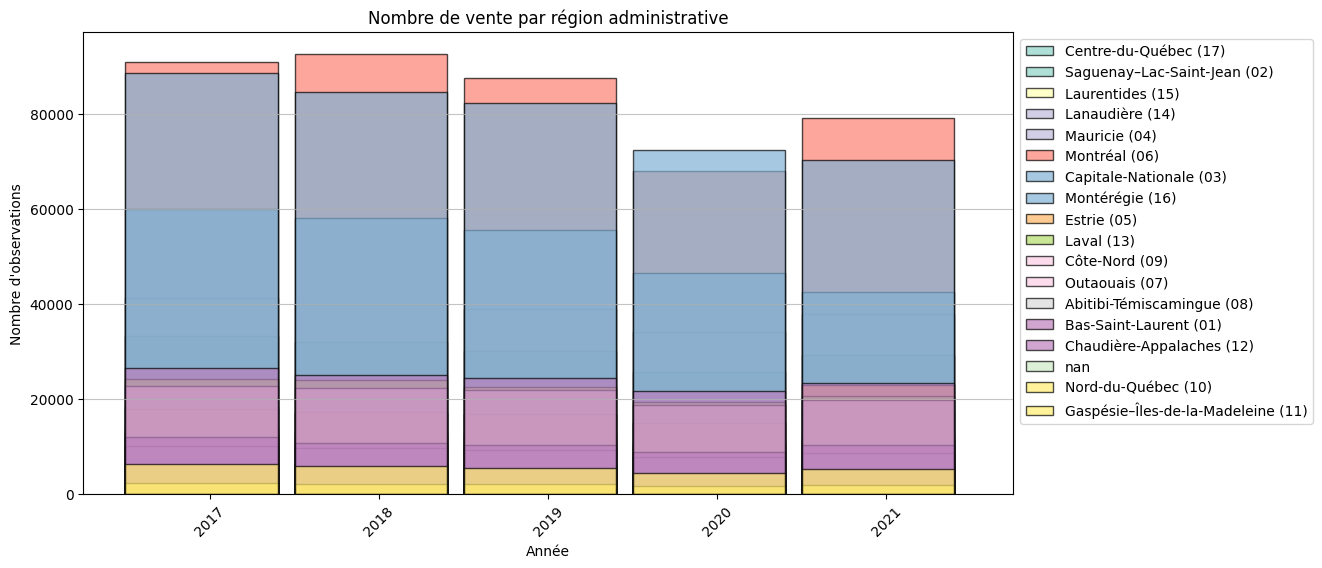

In [9]:
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Calculate the range for the x-axis
min_year = min(df_unique['AN'])
max_year = max(df_unique['AN'])

# Define the desired bin edges to center the bars
bin_edges = [i - 0.5 for i in range(min_year, max_year + 2)]

# Define a list of distinctive colors from the 'Set3' color map
colors = plt.cm.Set3(np.linspace(0, 1, len(df_unique['REG_ADM'].unique())))

plt.figure(figsize=(12, 6))

# Create a list of unique values in the 'TYPE_CARBU' column
carbu_types = df_unique['REG_ADM'].unique()

# Iterate through carbu types and stack the bars with distinctive colors
color_cycle = cycle(colors)
for carbu_type in carbu_types:
    data_subset = df_unique[df_unique['REG_ADM'] == carbu_type]
    
    # Reduce the width of the bars by setting the width parameter and specify color
    color = next(color_cycle)
    plt.hist(data_subset['AN'], bins=bin_edges, edgecolor='k', align='mid', range=(min_year - 0.5, max_year + 0.5), label=carbu_type, alpha=0.7, width=0.9, color=color)

plt.title('Nombre de vente par région administrative')
plt.xlabel('Année')
plt.ylabel("Nombre d'observations")
plt.xticks(range(min_year, max_year + 1), rotation=45)  # Set x-axis ticks for full years

# Move the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()


In [10]:
df_unique.head()

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6
2,2017,2017_0000000041,PAU,AU,NISSA,VERSA,2017,1113.0,4.0,1607.0,NaN,GRI,E,P,F,87.0,Laurentides (15),Les Laurentides (78 ),78010.0,https://www.guideautoweb.com/constructeurs/nis...,2017,versa-note,nissan,14498.0,19748.0,6.2,8.6
3,2017,2017_0000000044,PAU,AU,TOYOT,YARIS,2018,1050.0,4.0,1492.0,NaN,ROU,E,P,M,57.0,Lanaudière (14),Les Moulins (64 ),64008.0,https://www.guideautoweb.com/constructeurs/toy...,2018,yaris,toyota,15490.0,20530.0,5.8,7.9
4,2017,2017_0000000071,PAU,AU,NISSA,PATHF,2017,2018.0,6.0,3509.0,NaN,BLA,E,P,M,24.0,Mauricie (04),Maskinongé (51 ),51015.0,https://www.guideautoweb.com/constructeurs/nis...,2017,pathfinder,nissan,32598.0,48598.0,8.5,12.4


In [ ]:
# Top 10 VCI vendus par année
# Top 10 VÉ vendus par année
# Top 10 VHB vendus par année

In [10]:
df_unique.columns.tolist()

['AN',
 'NOSEQ_VEH',
 'CLAS',
 'TYP_VEH_CATEG_USA',
 'MARQ_VEH',
 'MODEL_VEH',
 'ANNEE_MOD',
 'MASSE_NETTE',
 'NB_CYL',
 'CYL_VEH',
 'NB_ESIEU_MAX',
 'COUL_ORIG',
 'TYP_CARBU',
 'TYP_DOSS_PERS',
 'PHYS_SEX',
 'PHYS_AGE',
 'REG_ADM',
 'MRC',
 'CG_FIXE',
 'link_model_an',
 'year',
 'model',
 'brand',
 'prix_min',
 'prix_max',
 'cons_min',
 'cons_max',
 'prix_mean',
 'cons_mean']

In [15]:
import pandas as pd
# Box plot prix par par année de E, L, W
df = df_unique[['AN', 'TYP_CARBU', 'prix_mean']]
plot_grouped = df.groupby(['AN', 'TYP_CARBU']).count()
plot_grouped.reset_index(inplace=True)
plot_grouped.head(2)

,AN,TYP_CARBU,prix_mean
0,2017,A,5
1,2017,D,1437


In [37]:
df_unique.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max,prix_mean,cons_mean
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5,30549.0,9.65
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6,40840.0,5.55


<Figure size 1200x600 with 0 Axes>

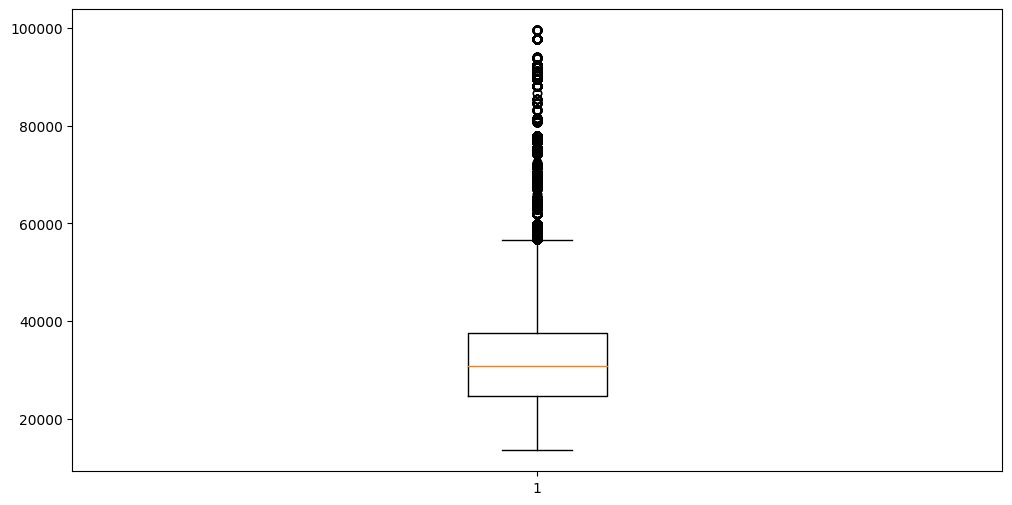

In [16]:
import matplotlib.pyplot as plt


data2017 = df_unique.loc[df_unique['AN']==2017]
data2017 = data2017.loc[data2017['prix_mean']<=100000]
data2017 = data2017[['TYP_CARBU', 'prix_mean']]


carbu_values = data2017['TYP_CARBU'].unique()
positions = range(1, len(carbu_values) + 1)


plt.figure(figsize = (12, 6))
# for carbu, position in zip(carbu_values, positions):
#     data = data2017.loc[data2017['TYP_CARBU'] == carbu]
#     plt.boxplot(data['prix_mean'], positions=[position], labels=[carbu])

plt.figure(figsize = (12, 6))
data = data2017.loc[data2017['TYP_CARBU'] == 'E']
plt.boxplot(data['prix_mean'])

plt.show()

In [10]:
col = ['TYP_CARBU', 'prix_mean']
data[col]

,TYP_CARBU,prix_mean
0,E,30549.0
2,E,17123.0
3,E,18010.0
4,E,40598.0
5,E,19882.5
...,...,...
496040,E,19882.5
496041,E,30549.0
496042,E,32245.0
496043,E,91950.0


In [ ]:
# box plot age par type de véhicle
# box plot age par année


In [ ]:
# scatter prix par consommation

In [ ]:
# Hist empillé homme vs femme par type de carburant
# Hist empillé homme vs femme années


In [ ]:
# hsit TYP_DOSS_PERS par année, par type de carburant

***
## Relation entre les varaibles
***

In [11]:
df_unique.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,NB_ESIEU_MAX,COUL_ORIG,TYP_CARBU,TYP_DOSS_PERS,PHYS_SEX,PHYS_AGE,REG_ADM,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,NaN,ROU,E,P,F,76.0,Centre-du-Québec (17),Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,NaN,NOI,W,P,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6


<Axes: >

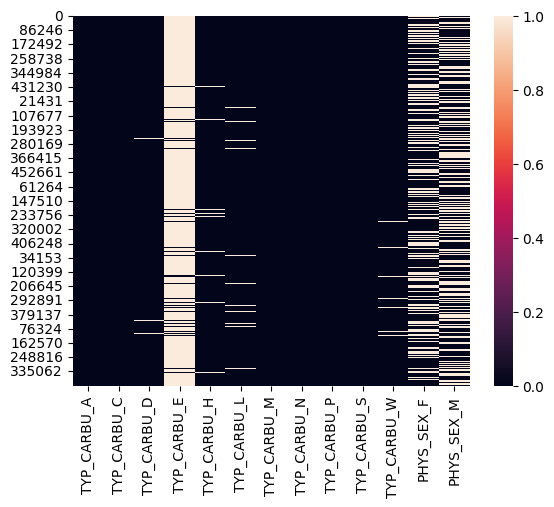

In [5]:
# matrice de relation avec les variables d'intérêt
import seaborn as sns

col_selection = df_unique[['TYP_CARBU', 'PHYS_SEX']]
df_corr = pd.get_dummies(col_selection)


sns.heatmap(df_corr)
